In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import sklearn
import pandas as pd
from sklearn import model_selection, linear_model



In [2]:
#load data 
data = pd.read_csv('data/hour.csv', sep=',', header=0,)
#convert to numpy array
data_array = np.array(data)
#data_array.shape

In [3]:
# # splitting training and testing data (features)
X = data_array[:,:-3]
# remove date column (second column)
X = np.delete(X, 1, 1)
# remove column with hours
#X = np.delete(X,5,1) 

# splitting training and testing data (targer)
y_cnt = data_array[:,-1]


In [4]:
# split the data for training 
X_train, X_test, y_cnt_train, y_cnt_test = model_selection.train_test_split(X, y_cnt, test_size=0.2)
#y_cnt_train = y_cnt_train[:,np.newaxis]
#y_cnt_test = y_cnt_test[:,np.newaxis]

print(X_train.shape, X_test.shape,y_cnt_train.shape, y_cnt_test.shape )

(13903, 13) (3476, 13) (13903,) (3476,)


In [5]:
# idk why but we need to change type even thou type(y_cnt) output is the same before and after 
# but it fixes following error 
# ValueError: Unknown label type: 'unknown'
y_cnt_train=y_cnt_train.astype('int')
y_cnt_test=y_cnt_test.astype('int')


In [6]:

regr = linear_model.LinearRegression()# fit classifier 
regr.fit(X_train, y_cnt_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# The coefficients
print('Coefficients:', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_cnt_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_cnt_test))


Coefficients: [ -6.10671212e-03   1.94246955e+01   1.34336760e+02   4.49126989e+00
   7.57558154e+00  -2.28030860e+01   1.41537976e+00   4.48267636e+00
  -4.38100926e+00   8.63796297e+01   2.26274991e+02  -1.96444928e+02
   4.29347982e+01]
Residual sum of squares: 19552.19
Variance score: 0.40


In [8]:
X_test.shape

(3476, 13)

In [9]:
y_cnt_test.shape

(3476,)

In [10]:
y_cnt_test.resize(X_test.shape)

In [11]:
y_cnt_test

array([[ 41,   6,   5, ...,  16, 264,  43],
       [117, 126, 186, ..., 112, 130,  53],
       [116,   5, 668, ...,  46, 227,   8],
       ..., 
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

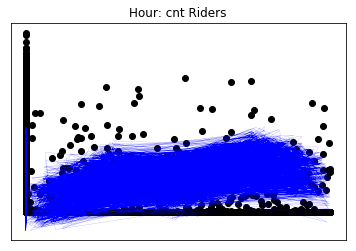

In [12]:
# visualize w/plot 

# Plot outputs
plt.scatter(X_test, y_cnt_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=0.1)

plt.xticks(())
plt.yticks(())
plt.title('Hour: cnt Riders')
plt.show()